In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

#2. Load the dataset

In [6]:
d=pd.read_csv("Mall_Customers.csv")
d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#3. Perform Below Visualizations

#a) Univariate Analysis

C:\Users\venga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

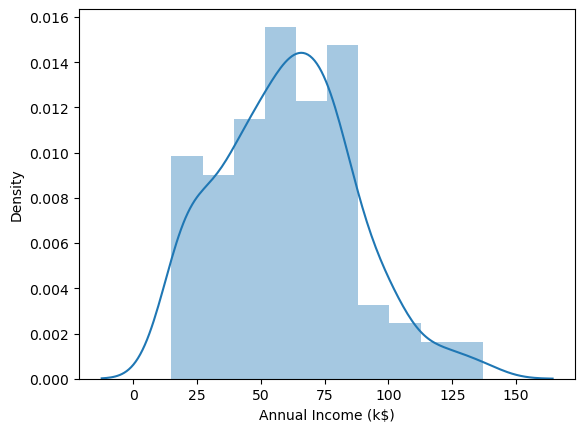

In [7]:
sns.distplot(d['Annual Income (k$)'])

#b) Bi - Variate Analysis

C:\Users\venga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

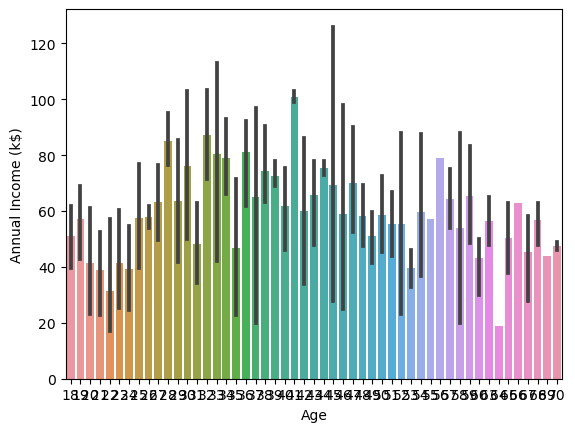

In [8]:
sns.barplot(d['Age'],d['Annual Income (k$)'])

#c)Multi - Variate Analysis

C:\Users\venga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

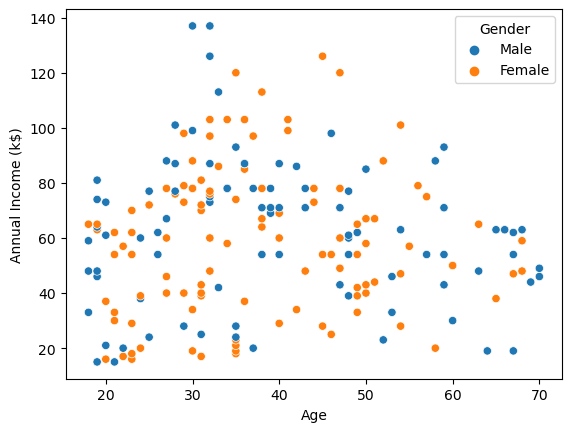

In [9]:
sns.scatterplot(d['Age'],d['Annual Income (k$)'],d['Gender'])

#4. Perform descriptive statistics on the dataset

In [10]:
d.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#5. Check for Missing values and deal with them.

In [11]:
d.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#6. Find the outliers and replace them outliers

C:\Users\venga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

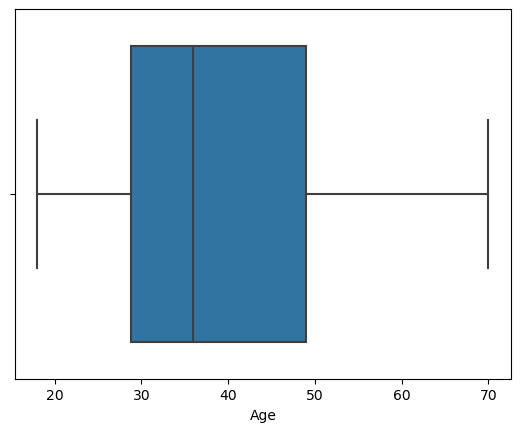

In [12]:
sns.boxplot(d['Age'])

In [14]:
q=d.quantile([0.85,0.65])
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.85,170.15,54.15,87.0,79.30
0.65,130.35,44.00,71.0,58.35


In [15]:
vgv=q.iloc[0]-q.iloc[1]
vgv

CustomerID                39.80
Age                       10.15
Annual Income (k$)        16.00
Spending Score (1-100)    20.95
dtype: float64

In [17]:
u=q.iloc[0]+(1.5*vgv)
u

CustomerID                229.850
Age                        69.375
Annual Income (k$)        111.000
Spending Score (1-100)    110.725
dtype: float64

In [18]:
l=q.iloc[1]-(1.5*vgv)
l

CustomerID                70.650
Age                       28.775
Annual Income (k$)        47.000
Spending Score (1-100)    26.925
dtype: float64

C:\Users\venga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

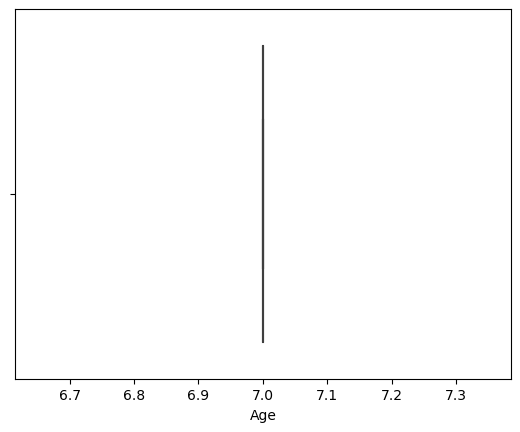

In [20]:
d['Age']=np.where(d['Age']>10,7,d['Age'])
sns.boxplot(d['Age'])

#7. Check for Categorical columns and perform encoding.

In [21]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
l=LabelEncoder()
o=OneHotEncoder()
d['Gender']=l.fit_transform(d['Gender'])
d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,7,15,39
1,2,1,7,15,81
2,3,0,7,16,6
3,4,0,7,16,77
4,5,0,7,17,40


#8. Scaling the data

In [22]:
x=data.drop('Annual Income (k$)',axis=1)
y=data['Annual Income (k$)']
x

,CustomerID,Gender,Age,Spending Score (1-100)
0,1,Male,19,39
1,2,Male,21,81
2,3,Female,20,6
3,4,Female,23,77
4,5,Female,31,40
...,...,...,...,...
195,196,Female,35,79
196,197,Female,45,28
197,198,Male,32,74
198,199,Male,32,18


In [23]:
y

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
s=StandardScaler()
x_scale=s.fit_transform(d)
x_scale

array([[-1.7234121 ,  1.12815215,  0.        , -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215,  0.        , -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526,  0.        , -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526,  0.        , -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526,  0.        , -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526,  0.        , -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526,  0.        , -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526,  0.        , -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215,  0.        , -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526,  0.        , -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215,  0.        , -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526,  0.        , -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526,  0.        , -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526,  0. 

#9. Perform any of the clustering algorithms

In [26]:
from sklearn.cluster import MiniBatchKMeans
km=MiniBatchKMeans()
cluster=km.fit_predict(x_scale)
cluster

C:\Users\venga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


array([5, 2, 4, 7, 4, 7, 4, 7, 5, 7, 5, 7, 4, 7, 5, 2, 4, 2, 5, 7, 5, 2,
       4, 2, 4, 2, 4, 2, 4, 7, 5, 7, 5, 2, 4, 7, 4, 7, 4, 7, 4, 2, 2, 7,
       4, 7, 7, 4, 4, 4, 1, 2, 1, 2, 4, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, 1, 3, 0, 6, 0, 6, 0, 6,
       1, 3, 0, 3, 0, 6, 0, 3, 0, 6, 1, 3, 0, 6, 0, 3, 0, 6, 0, 6, 0, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 6, 0, 6, 0, 6, 0, 3,
       0, 6, 0, 6, 0, 3, 0, 3, 0, 6, 0, 6, 0, 3, 0, 3, 0, 3, 0, 3, 0, 6,
       0, 6])

#10. Add the cluster data with the primary dataset

In [27]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
d=pd.DataFrame(x_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
da

In [45]:
d['kmeans cluster']=pd.Series(cluster)
d.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans cluster
0,1,1,7,15,39,5
1,2,1,7,15,81,2
2,3,0,7,16,6,4
3,4,0,7,16,77,7
4,5,0,7,17,40,4


#11. Split the data into dependent and independent variables.

In [46]:
x=d.iloc[:,0:4]
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,7,15
1,2,1,7,15
2,3,0,7,16
3,4,0,7,16
4,5,0,7,17
...,...,...,...,...
195,196,0,7,120
196,197,0,7,126
197,198,1,7,126
198,199,1,7,137


In [47]:
y=d['kmeans cluster']
y

0      5
1      2
2      4
3      7
4      4
      ..
195    3
196    0
197    6
198    0
199    6
Name: kmeans cluster, Length: 200, dtype: int32

#12. Split the data into training and testing

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=1)

#13. Build the Model

#14. Train the Model

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

#15. Test the Model

In [50]:
pred_test=lr.predict(x_test)
pred_test

array([1, 4, 4, 2, 0, 0, 2, 4, 7, 0, 6, 5, 7, 1, 2, 1, 3, 7, 0, 2, 2, 4,
       4, 1, 7, 0, 4, 4, 3, 2, 1, 3, 0, 6, 0, 1, 0, 1, 1, 0, 2, 2, 3, 5,
       1, 7, 1, 7, 6, 1, 2, 6, 1, 2, 2, 6, 3, 1, 6, 0])

In [51]:
y_test

58     1
40     4
34     4
102    2
184    0
198    0
95     2
4      4
29     7
168    0
171    6
18     5
11     7
89     1
110    2
118    1
159    3
35     7
136    0
59     2
51     2
16     4
44     4
94     1
31     7
162    0
38     4
28     4
193    3
27     2
47     4
165    3
194    0
177    6
176    0
97     1
174    0
73     1
69     1
172    0
108    2
107    2
189    3
14     5
56     1
19     7
114    1
39     7
185    6
124    1
98     2
123    6
119    1
53     2
33     2
179    6
181    3
106    1
199    6
138    0
Name: kmeans cluster, dtype: int32

#16. Measure the performance using Evaluation Metrics.

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test,y_test)

0.9833333333333333